<a href="https://colab.research.google.com/github/AYUSH-002/Data-Driven-Approach-to-Forecasting-and-Managing-Flight-Delays/blob/master/FinalProject1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%matplotlib inline

import datetime, warnings, scipy
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

In [2]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Load the CSV file from Google Drive
import pandas as pd
flight_data = pd.read_csv('/content/drive/My Drive/2018.csv')

result = pd.concat([flight_data.head(2), flight_data.tail(2)])
print(result)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
            FL_DATE OP_CARRIER  OP_CARRIER_FL_NUM ORIGIN DEST  CRS_DEP_TIME  \
0        2018-01-01         UA               2429    EWR  DEN          1517   
1        2018-01-01         UA               2427    LAS  SFO          1115   
7213444  2018-12-31         AA               1818    CLT  RDU          1300   
7213445  2018-12-31         AA               1818    RDU  CLT          1435   

         DEP_TIME  DEP_DELAY  TAXI_OUT  WHEELS_OFF  WHEELS_ON  TAXI_IN  \
0          1512.0       -5.0      15.0      1527.0     1712.0     10.0   
1          1107.0       -8.0      11.0      1118.0     1223.0      7.0   
7213444    1323.0       23.0      11.0      1334.0     1400.0      4.0   
7213445    1443.0        8.0       8.0      1451.0     1535.0      7.0   

         CRS_ARR_TIME  ARR_TIME  ARR_DELAY  CANCELLED CANCELLATION_CODE  \
0                1745    1722

In [3]:
# Checking the dimension of the dataset
flight_data.shape

print("There are " + str(flight_data.shape[0]) + " rows and " + str(flight_data.shape[1]) + " columns in the flight dataset.")


There are 7213446 rows and 28 columns in the flight dataset.


In [4]:
# Converting flight_data column to datetime format
flight_data['FL_DATE'] =  pd.to_datetime(flight_data['FL_DATE'], format='%Y-%m-%d')

In [5]:
# Checking column type
flight_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7213446 entries, 0 to 7213445
Data columns (total 28 columns):
 #   Column               Dtype         
---  ------               -----         
 0   FL_DATE              datetime64[ns]
 1   OP_CARRIER           object        
 2   OP_CARRIER_FL_NUM    int64         
 3   ORIGIN               object        
 4   DEST                 object        
 5   CRS_DEP_TIME         int64         
 6   DEP_TIME             float64       
 7   DEP_DELAY            float64       
 8   TAXI_OUT             float64       
 9   WHEELS_OFF           float64       
 10  WHEELS_ON            float64       
 11  TAXI_IN              float64       
 12  CRS_ARR_TIME         int64         
 13  ARR_TIME             float64       
 14  ARR_DELAY            float64       
 15  CANCELLED            float64       
 16  CANCELLATION_CODE    object        
 17  DIVERTED             float64       
 18  CRS_ELAPSED_TIME     float64       
 19  ACTUAL_ELAPSED_TIME  

## **Metadata**
FL_DATE = Date of the Flight

OP_CARRIER = Airline Identifier

OP_CARRIER_FL_NUM = Flight Number

ORIGIN = Starting Airport Code

DEST = Destination Airport Code

CRS_DEP_TIME = Planned Departure Time

DEP_TIME = Actual Departure Time

DEP_DELAY = Total Delay on Departure in minutes

TAXI_OUT = The time duration elapsed between departure from the origin airport gate and wheels off

WHEELS_OFF = The time point that the aircraft's wheels leave the ground

WHEELS_ON = The time point that the aircraft'ss wheels touch on the ground

TAXI_IN = The time duration elapsed between wheels-on and gate arrival at the destination airport

CRS_ARR_TIME = Planned arrival time

ARR_TIME = Actual Arrival Time = ARRIVAL_TIME - SCHEDULED_ARRIVAL

ARR_DELAY = Total Delay on Arrival in minutes

CANCELLED = Flight Cancelled (1 = cancelled)

CANCELLATION_CODE = Reason for Cancellation of flight: A - Airline/Carrier; B - Weather; C - National Air System; D - Security

DIVERTED = Aircraft landed on different airport that the one scheduled

CRS_ELAPSED_TIME = Planned time amount needed for the flight trip

ACTUAL_ELAPSED_TIME = AIR_TIME+TAXI_IN+TAXI_OUT

AIR_TIME = The time duration between wheels_off and wheels_on time

DISTANCE = Distance between two airports

CARRIER_DELAY = Delay caused by the airline in minutes

WEATHER_DELAY = Delay caused by weather

NAS_DELAY = Delay caused by air system

SECURITY_DELAY = caused by security reasons

LATE_AIRCRAFT_DELAY = Delay caused by security

In [6]:
import pandas as pd

def checkMissing(data, perc=0):
    """
    Takes in a dataframe and returns
    the percentage of missing values.

    Parameters:
    data (pd.DataFrame): The dataset to check for missing values.
    perc (float): The percentage threshold to filter missing values (default is 0).
    """
    # Calculate the percentage of missing values for each column
    missing = [(col, data[col].isna().mean() * 100) for col in data]

    # Convert to a DataFrame for easier manipulation
    missing_df = pd.DataFrame(missing, columns=["column_name", "percentage"])

    # Filter columns with missing values greater than the specified threshold
    missing_df = missing_df[missing_df["percentage"] > perc]

    # Sort the columns by the percentage of missing values in descending order and reset index
    missing_df_sorted = missing_df.sort_values("percentage", ascending=False).reset_index(drop=True)

    # Display the result
    print(missing_df_sorted)

# Calculate and display the proportion of missing data
print("Proportion of missing data in columns:")
checkMissing(flight_data)


Proportion of missing data in columns:
            column_name  percentage
0           Unnamed: 27  100.000000
1     CANCELLATION_CODE   98.383796
2   LATE_AIRCRAFT_DELAY   81.247382
3         CARRIER_DELAY   81.247382
4         WEATHER_DELAY   81.247382
5             NAS_DELAY   81.247382
6        SECURITY_DELAY   81.247382
7             ARR_DELAY    1.899785
8   ACTUAL_ELAPSED_TIME    1.863769
9              AIR_TIME    1.863769
10            WHEELS_ON    1.653107
11              TAXI_IN    1.653107
12             ARR_TIME    1.653093
13            DEP_DELAY    1.625215
14             TAXI_OUT    1.605751
15           WHEELS_OFF    1.605737
16             DEP_TIME    1.557051
17     CRS_ELAPSED_TIME    0.000139


These columns are dropped: Unnamed: 27, CANCELLATION_CODE, LATE_AIRCRAFT_DELAY, CARRIER_DELAY, WEATHER_DELAY, NAS_DELAY and SECURITY_DELAY from the dataframe as these columns had more than 50% of missing values which does not provide any useful information to our analysis. Since our main objective is to predict flight delay, column CANCELLED is irrelevant to our scope of work as a canceled flight is not a delayed flight as it never left nor arrived to its destination for whatever reason. OP_CARRIER_FL_NUM is also not relevant to our predictions.

After further investigation on the dataset, LATE_AIRCRAFT_DELAY, CARRIER_DELAY, WEATHER_DELAY, NAS_DELAY and SECURITY_DELAY are showing the split of delayed minutes for the flight. Thus, the missing data is actually implying that there is no delay for the instance. The missing values for these attributes are imputed with zero.

In [7]:
#Fill the missing value 0
flight_data['LATE_AIRCRAFT_DELAY']=flight_data['LATE_AIRCRAFT_DELAY'].fillna(0)
flight_data['CARRIER_DELAY']=flight_data['CARRIER_DELAY'].fillna(0)
flight_data['WEATHER_DELAY']=flight_data['WEATHER_DELAY'].fillna(0)
flight_data['NAS_DELAY']=flight_data['NAS_DELAY'].fillna(0)
flight_data['SECURITY_DELAY']=flight_data['SECURITY_DELAY'].fillna(0)

# **Transformation of Duration time taken**
Checking on the calculation for Departure Delay and Arrival Delay in minutes

The derivation of the delayed time of departure and delayed time of arrival is as shown below:


*   **DEP_DELAY = CRS_DEP_TIME - DEP_TIME**
*   **ARR_DELAY = ARR_TIME - CRS_ARR_TIME**

CRS_DEP_TIME, DEP_TIME, CRS_ARR_TIME and ARR_TIME can be eliminated as DEP_DELAY and ARR_DELAY are informative enough to provide the length of time of the delay in minutes.

In [8]:
# Function that convert the 'HHMM' string to datetime.time
def format_heure(chaine):
    if pd.isnull(chaine):
        return np.nan
    else:
        if chaine == 2400: chaine = 0
        chaine = "{0:04d}".format(int(chaine))
        heure = datetime.time(int(chaine[0:2]), int(chaine[2:4]))
        return heure
        # return pd.to_datetime(heure, format='%H:%M:%S')

    # pd.to_datetime(heure, format='%Y-%m-%d')

In [9]:
flight_data['DEP_TIME'] = flight_data['DEP_TIME'].apply(format_heure)
flight_data['CRS_DEP_TIME'] = flight_data['CRS_DEP_TIME'].apply(format_heure)

flight_data['ARR_TIME'] = flight_data['ARR_TIME'].apply(format_heure)
flight_data['CRS_ARR_TIME'] = flight_data['CRS_ARR_TIME'].apply(format_heure)

flight_data['WHEELS_OFF'] = flight_data['WHEELS_OFF'].apply(format_heure)
flight_data['WHEELS_ON'] = flight_data['WHEELS_ON'].apply(format_heure)

Obtain duration of time taken for:

*   Flight take off and wheels off
*   Flight on land and wheels on



In [10]:
# Convert flight_data column to datetime format

def time_difference(actual,plan):
    actual_time = pd.to_timedelta(actual.astype(str))
    plan_time = pd.to_timedelta(plan.astype(str))
    return actual_time.sub(plan_time).dt.total_seconds().div(60)

flight_data['WHEELS_OFF_elapse'] =  time_difference(flight_data['WHEELS_OFF'],flight_data['DEP_TIME'])
flight_data['WHEELS_ON_elapse'] =  time_difference(flight_data['ARR_TIME'] ,flight_data['WHEELS_ON'])

# Remove incorrect record
flight_data=flight_data[flight_data['WHEELS_OFF_elapse']>0]
flight_data=flight_data[flight_data['WHEELS_ON_elapse']>0]

In [11]:
result = pd.concat([flight_data.head(2), flight_data.tail(2)])
print(result)

           FL_DATE OP_CARRIER  OP_CARRIER_FL_NUM ORIGIN DEST CRS_DEP_TIME  \
0       2018-01-01         UA               2429    EWR  DEN     15:17:00   
1       2018-01-01         UA               2427    LAS  SFO     11:15:00   
7213444 2018-12-31         AA               1818    CLT  RDU     13:00:00   
7213445 2018-12-31         AA               1818    RDU  CLT     14:35:00   

         DEP_TIME  DEP_DELAY  TAXI_OUT WHEELS_OFF WHEELS_ON  TAXI_IN  \
0        15:12:00       -5.0      15.0   15:27:00  17:12:00     10.0   
1        11:07:00       -8.0      11.0   11:18:00  12:23:00      7.0   
7213444  13:23:00       23.0      11.0   13:34:00  14:00:00      4.0   
7213445  14:43:00        8.0       8.0   14:51:00  15:35:00      7.0   

        CRS_ARR_TIME  ARR_TIME  ARR_DELAY  CANCELLED CANCELLATION_CODE  \
0           17:45:00  17:22:00      -23.0        0.0               NaN   
1           12:54:00  12:30:00      -24.0        0.0               NaN   
7213444     13:50:00  14:04:00 

In [12]:
# Check column type
flight_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7051259 entries, 0 to 7213445
Data columns (total 30 columns):
 #   Column               Dtype         
---  ------               -----         
 0   FL_DATE              datetime64[ns]
 1   OP_CARRIER           object        
 2   OP_CARRIER_FL_NUM    int64         
 3   ORIGIN               object        
 4   DEST                 object        
 5   CRS_DEP_TIME         object        
 6   DEP_TIME             object        
 7   DEP_DELAY            float64       
 8   TAXI_OUT             float64       
 9   WHEELS_OFF           object        
 10  WHEELS_ON            object        
 11  TAXI_IN              float64       
 12  CRS_ARR_TIME         object        
 13  ARR_TIME             object        
 14  ARR_DELAY            float64       
 15  CANCELLED            float64       
 16  CANCELLATION_CODE    object        
 17  DIVERTED             float64       
 18  CRS_ELAPSED_TIME     float64       
 19  ACTUAL_ELAPSED_TIME  float

In [13]:
# Drop the unused columns

flight_data.drop(['Unnamed: 27',
                  'CANCELLATION_CODE',
                  'CANCELLED',
                  'OP_CARRIER_FL_NUM',
                  'CRS_DEP_TIME',
                  'DEP_TIME',
                  'CRS_ARR_TIME',
                  'ARR_TIME',
                  'WHEELS_ON',
                  'WHEELS_OFF'
                 ],
                 axis = 1, inplace = True)

Imputation with cold-deck method may introduce noise to the data, so to avoid that to interfere the overall performance, Since we will just drop those missing rows as the percentage of missing values is just 1%.

In [14]:
#Check number of missing values
flight_data.isna().sum()

,0
FL_DATE,0
OP_CARRIER,0
ORIGIN,0
DEST,0
DEP_DELAY,4735
TAXI_OUT,0
TAXI_IN,0
ARR_DELAY,17560
DIVERTED,0
CRS_ELAPSED_TIME,7


In [15]:
flight_data = flight_data.dropna()

In [16]:
#Check number of missing values
flight_data.isna().sum()

,0
FL_DATE,0
OP_CARRIER,0
ORIGIN,0
DEST,0
DEP_DELAY,0
TAXI_OUT,0
TAXI_IN,0
ARR_DELAY,0
DIVERTED,0
CRS_ELAPSED_TIME,0


# **Rename of OP_CARRIER**
OP_CARRIER refers to the airline identifier recorded with its abbreviation form. To make the content more intuitive, the column of abbreviation names are transformed with airlines extended names. The main reference source for the extended name is obtained from https://en.wikipedia.org/wiki/List_of_airlines_of_the_United_States

In [17]:
# Check the instances for OP_CARRIER
flight_data.OP_CARRIER.unique()

array(['UA', 'AS', '9E', 'B6', 'EV', 'F9', 'G4', 'HA', 'MQ', 'NK', 'OH',
       'OO', 'VX', 'WN', 'YV', 'YX', 'AA', 'DL'], dtype=object)

In [18]:
flight_data['OP_CARRIER'].replace({
    'UA':'United Airlines',
    'AS':'Alaska Airlines',
    '9E':'Endeavor Air',
    'B6':'JetBlue Airways',
    'EV':'ExpressJet',
    'F9':'Frontier Airlines',
    'G4':'Allegiant Air',
    'HA':'Hawaiian Airlines',
    'MQ':'Envoy Air',
    'NK':'Spirit Airlines',
    'OH':'PSA Airlines',
    'OO':'SkyWest Airlines',
    'VX':'Virgin America',
    'WN':'Southwest Airlines',
    'YV':'Mesa Airline',
    'YX':'Republic Airways',
    'AA':'American Airlines',
    'DL':'Delta Airlines'
}, inplace=True)

In [19]:
flight_data.OP_CARRIER.nunique()

18

In [20]:
flight_data.OP_CARRIER.value_counts()

,count
OP_CARRIER,
Southwest Airlines,1326376
Delta Airlines,938464
American Airlines,892021
SkyWest Airlines,758717
United Airlines,609226
Republic Airways,303927
JetBlue Airways,293075
Envoy Air,283788
PSA Airlines,264929


# **Data reduction: Focus on Busy Airports**


In [21]:
flight_data.DEST.value_counts().iloc[:20]

,count
DEST,
ATL,384813
ORD,322119
DFW,271096
DEN,232583
CLT,225450
LAX,217452
SFO,171824
PHX,171433
IAH,170255


In [22]:
top_cities = flight_data.DEST.value_counts().iloc[:5].rename_axis('DEST').reset_index(name='TOTAL_FLIGHTS')
top_cities.head()

,DEST,TOTAL_FLIGHTS
0,ATL,384813
1,ORD,322119
2,DFW,271096
3,DEN,232583
4,CLT,225450


In [23]:
# Checking the cities within the numpy array just to verify that it worked
top_cities.DEST.unique()

# Creating a list with top cities only:
city_list = top_cities['DEST'].tolist()
print(city_list)

['ATL', 'ORD', 'DFW', 'DEN', 'CLT']


In [24]:
boolean_series =  flight_data.DEST.isin(city_list)
flight_data =  flight_data[boolean_series]
flight_data.head(10)

,FL_DATE,OP_CARRIER,ORIGIN,DEST,DEP_DELAY,TAXI_OUT,TAXI_IN,ARR_DELAY,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,WHEELS_OFF_elapse,WHEELS_ON_elapse
0,2018-01-01,United Airlines,EWR,DEN,-5.0,15.0,10.0,-23.0,0.0,268.0,250.0,225.0,1605.0,0.0,0.0,0.0,0.0,0.0,15.0,10.0
2,2018-01-01,United Airlines,SNA,DEN,-5.0,15.0,5.0,-13.0,0.0,134.0,126.0,106.0,846.0,0.0,0.0,0.0,0.0,0.0,15.0,5.0
3,2018-01-01,United Airlines,RSW,ORD,6.0,19.0,6.0,-2.0,0.0,190.0,182.0,157.0,1120.0,0.0,0.0,0.0,0.0,0.0,19.0,6.0
9,2018-01-01,United Airlines,RIC,DEN,-2.0,12.0,8.0,-17.0,0.0,252.0,237.0,217.0,1482.0,0.0,0.0,0.0,0.0,0.0,12.0,8.0
13,2018-01-01,United Airlines,EWR,ATL,11.0,11.0,5.0,-3.0,0.0,154.0,140.0,124.0,746.0,0.0,0.0,0.0,0.0,0.0,11.0,5.0
22,2018-01-01,United Airlines,RSW,ORD,-7.0,25.0,3.0,-8.0,0.0,190.0,189.0,161.0,1120.0,0.0,0.0,0.0,0.0,0.0,25.0,3.0
37,2018-01-01,United Airlines,RDU,ORD,-4.0,14.0,3.0,-17.0,0.0,140.0,127.0,110.0,646.0,0.0,0.0,0.0,0.0,0.0,14.0,3.0
38,2018-01-01,United Airlines,DEN,ORD,-6.0,12.0,19.0,-7.0,0.0,147.0,146.0,115.0,888.0,0.0,0.0,0.0,0.0,0.0,12.0,19.0
40,2018-01-01,United Airlines,MIA,ORD,-2.0,14.0,11.0,-14.0,0.0,201.0,189.0,164.0,1197.0,0.0,0.0,0.0,0.0,0.0,14.0,11.0
43,2018-01-01,United Airlines,IAD,DEN,18.0,14.0,5.0,-6.0,0.0,237.0,213.0,194.0,1452.0,0.0,0.0,0.0,0.0,0.0,14.0,5.0


In [25]:
flight_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1436061 entries, 0 to 7213445
Data columns (total 20 columns):
 #   Column               Non-Null Count    Dtype         
---  ------               --------------    -----         
 0   FL_DATE              1436061 non-null  datetime64[ns]
 1   OP_CARRIER           1436061 non-null  object        
 2   ORIGIN               1436061 non-null  object        
 3   DEST                 1436061 non-null  object        
 4   DEP_DELAY            1436061 non-null  float64       
 5   TAXI_OUT             1436061 non-null  float64       
 6   TAXI_IN              1436061 non-null  float64       
 7   ARR_DELAY            1436061 non-null  float64       
 8   DIVERTED             1436061 non-null  float64       
 9   CRS_ELAPSED_TIME     1436061 non-null  float64       
 10  ACTUAL_ELAPSED_TIME  1436061 non-null  float64       
 11  AIR_TIME             1436061 non-null  float64       
 12  DISTANCE             1436061 non-null  float64       
 13  CA

# **Transformation for Date**

In [26]:
import calendar
flight_date=pd.DatetimeIndex(flight_data['FL_DATE'])

flight_data['DAY'] = flight_date.day
flight_data['MONTH'] = flight_date.month
flight_data['MONTH_AB'] = flight_data['MONTH'].apply(lambda x: calendar.month_abbr[x])
flight_data['DAYOFWEEK'] = flight_date.dayofweek
flight_data['DAYNAME'] = flight_data['DAYOFWEEK'].apply(lambda x: calendar.day_name[x])

# 1 Weekday, 0 Weekend
daytype = []
for value in flight_data['DAYOFWEEK']:
    if value in (0,1,2,3,4):
        daytype.append(1) #weekday
    else:
        daytype.append(0) #weekend
flight_data['WEEKDAY'] = daytype
flight_data.head(2)

,FL_DATE,OP_CARRIER,ORIGIN,DEST,DEP_DELAY,TAXI_OUT,TAXI_IN,ARR_DELAY,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,WHEELS_OFF_elapse,WHEELS_ON_elapse,DAY,MONTH,MONTH_AB,DAYOFWEEK,DAYNAME,WEEKDAY
0,2018-01-01,United Airlines,EWR,DEN,-5.0,15.0,10.0,-23.0,0.0,268.0,250.0,225.0,1605.0,0.0,0.0,0.0,0.0,0.0,15.0,10.0,1,1,Jan,0,Monday,1
2,2018-01-01,United Airlines,SNA,DEN,-5.0,15.0,5.0,-13.0,0.0,134.0,126.0,106.0,846.0,0.0,0.0,0.0,0.0,0.0,15.0,5.0,1,1,Jan,0,Monday,1


In [27]:
# For checking
print('Maximum number of days in a month:', flight_data.DAY.nunique())
print('Total number of months:', flight_data.MONTH.nunique())
print('Total number of days per week:', flight_data.DAYNAME.nunique())

print()

print('Months present in dataframe:',flight_data.MONTH.unique())
print('Months present in dataframe:', flight_data.MONTH_AB.unique())

print()
print('Days present in dataframe:', flight_data['DAYOFWEEK'].unique())
print('Days present in dataframe:', flight_data.DAYNAME.unique())

Maximum number of days in a month: 31
Total number of months: 12
Total number of days per week: 7

Months present in dataframe: [ 1  2  3  4  5  6  7  8  9 10 11 12]
Months present in dataframe: ['Jan' 'Feb' 'Mar' 'Apr' 'May' 'Jun' 'Jul' 'Aug' 'Sep' 'Oct' 'Nov' 'Dec']

Days present in dataframe: [0 1 2 3 4 5 6]
Days present in dataframe: ['Monday' 'Tuesday' 'Wednesday' 'Thursday' 'Friday' 'Saturday' 'Sunday']


# **Rename of Airports and city name**
These two column have the IATA airports codes for the origin and destination. I will try to change it to a real city name so that I can do flight analysis per city as well as part of the EDA.

For this purpose I found a file called airports from 2015, therefore it might be incomplete so I will have to play with it and see what I can do to complete it.

Lets start by loading the file and by exploring it:

Columns ORIGIN and DEST are made up of the IATA airports codes to display the origin and destination. Cleaning of the columns are required to obtain the city name for further flight analysis by destination. For this purpose I found a file called airports from 2015, therefore it might be incomplete so I will have to play with it and see what I can do to complete it.

In [28]:
airports = pd.read_csv('airports.csv')
airports.head(10)

,IATA_CODE,AIRPORT,CITY
0,AZA,Phoenix-Mesa Gateway Airport,NaN
1,BKG,Branson Airport,NaN
2,ABE,Lehigh Valley International Airport,Allentown
3,ABI,Abilene Regional Airport,Abilene
4,ABQ,Albuquerque International Sunport,Albuquerque
5,ABR,Aberdeen Regional Airport,Aberdeen
6,ABY,Southwest Georgia Regional Airport,Albany
7,ACK,Nantucket Memorial Airport,Nantucket
8,ACT,Waco Regional Airport,Waco
9,ACV,Arcata Airport,Arcata/Eureka


In [29]:
# Check dimension of dataset
airports.shape
print("There are "+ str(airports.shape[0]) +" rows and "+ str(airports.shape[1]) +" columns from the airport dataset.")

There are 353 rows and 3 columns from the airport dataset.


In [30]:
print("There are "+str(len(airports.IATA_CODE.unique()))+" records")

There are 353 records


In [31]:
# Covert to list
airport_IATA_CODE = list(airports['IATA_CODE'])

In [32]:
flight_data.ORIGIN.unique()

array(['EWR', 'SNA', 'RSW', 'RIC', 'RDU', 'DEN', 'MIA', 'IAD', 'ANC',
       'MSP', 'ALB', 'LAX', 'IND', 'MSY', 'MCO', 'PHX', 'IAH', 'SJC',
       'ORF', 'DCA', 'PIT', 'ORD', 'SMF', 'SFO', 'SAN', 'EGE', 'JAC',
       'PDX', 'ONT', 'MKE', 'PHL', 'BOS', 'OKC', 'BDL', 'SRQ', 'AUS',
       'BZN', 'DFW', 'FLL', 'BOI', 'GEG', 'TUS', 'KOA', 'LGA', 'LIH',
       'SEA', 'OGG', 'PSP', 'TPA', 'OMA', 'ABQ', 'DTW', 'CLE', 'SJU',
       'CLT', 'ATL', 'LAS', 'MCI', 'BIL', 'SLC', 'BWI', 'SAT', 'RNO',
       'HNL', 'CID', 'MEM', 'BUF', 'FSD', 'DSM', 'ILM', 'JAN', 'OAJ',
       'TLH', 'CHS', 'BMI', 'ABY', 'DHN', 'MDT', 'FSM', 'JFK', 'HSV',
       'TYS', 'BQK', 'CHA', 'GSP', 'AGS', 'MOB', 'MGM', 'TRI', 'GSO',
       'AVL', 'CSG', 'VLD', 'PIA', 'LFT', 'GNV', 'FAY', 'BTV', 'AEX',
       'FAR', 'EWN', 'CAE', 'BTR', 'ROW', 'BHM', 'MHK', 'SAF', 'MAF',
       'LBB', 'COU', 'GRK', 'MLU', 'DAY', 'PWM', 'FNT', 'EVV', 'BNA',
       'ICT', 'SDF', 'SAV', 'CRW', 'SBN', 'CAK', 'PNS', 'COS', 'MYR',
       'TUL', 'ECP',

In [33]:
# Get the list of origin and destination from `flight_data`
flight_ORIGIN = flight_data.ORIGIN.unique().tolist()
flight_DEST = flight_data.DEST.unique().tolist()

# Check type
print("Type:")
print(type(flight_ORIGIN))
print(type(flight_DEST))
print()
print("Length:")
print("Origin: "+str(len(flight_ORIGIN)))
print("Destination: "+str(len(flight_DEST)))

Type:
<class 'list'>
<class 'list'>

Length:
Origin: 283
Destination: 5


# **Between flight_ORIGIN and airport_IATA_CODE**

In [34]:
difference = [item for item in flight_ORIGIN if item not in airport_IATA_CODE]
print("IATA Code (Origin) that is not found from the airport data:")
print(difference)
print()
print("There are "+str(len(difference)))

IATA Code (Origin) that is not found from the airport data:
[]

There are 0


# **Between flight_DEST and airport_IATA_CODE**

In [35]:
difference_2 = [item for item in flight_DEST if item not in airport_IATA_CODE]
print("IATA Code (Destination) that is not found from airport data:")
print(difference_2)
print()

IATA Code (Destination) that is not found from airport data:
[]



The next step if to save this dataframe as a .csv file and to open it in Excel where I will add the necessary columns to make it match with the airports dataframe. These columns are:
* Airport Name
*City Name



In [36]:
# Creating a dictionary and looking at its type for QC purposes
airport_dict = pd.Series(airports.AIRPORT.values, index=airports.IATA_CODE).to_dict()
print(type(airport_dict))

<class 'dict'>


In [37]:
flight_data['ORIGIN'].replace(airport_dict, inplace=True)
flight_data['DEST'].replace(airport_dict, inplace=True)
flight_data.head()

,FL_DATE,OP_CARRIER,ORIGIN,DEST,DEP_DELAY,TAXI_OUT,TAXI_IN,ARR_DELAY,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,WHEELS_OFF_elapse,WHEELS_ON_elapse,DAY,MONTH,MONTH_AB,DAYOFWEEK,DAYNAME,WEEKDAY
0,2018-01-01,United Airlines,Newark Liberty International Airport,Denver International Airport,-5.0,15.0,10.0,-23.0,0.0,268.0,250.0,225.0,1605.0,0.0,0.0,0.0,0.0,0.0,15.0,10.0,1,1,Jan,0,Monday,1
2,2018-01-01,United Airlines,John Wayne AirportÂ (Orange County Airport),Denver International Airport,-5.0,15.0,5.0,-13.0,0.0,134.0,126.0,106.0,846.0,0.0,0.0,0.0,0.0,0.0,15.0,5.0,1,1,Jan,0,Monday,1
3,2018-01-01,United Airlines,Southwest Florida International Airport,Chicago O'Hare International Airport,6.0,19.0,6.0,-2.0,0.0,190.0,182.0,157.0,1120.0,0.0,0.0,0.0,0.0,0.0,19.0,6.0,1,1,Jan,0,Monday,1
9,2018-01-01,United Airlines,Richmond International Airport,Denver International Airport,-2.0,12.0,8.0,-17.0,0.0,252.0,237.0,217.0,1482.0,0.0,0.0,0.0,0.0,0.0,12.0,8.0,1,1,Jan,0,Monday,1
13,2018-01-01,United Airlines,Newark Liberty International Airport,Hartsfield-Jackson Atlanta International Airport,11.0,11.0,5.0,-3.0,0.0,154.0,140.0,124.0,746.0,0.0,0.0,0.0,0.0,0.0,11.0,5.0,1,1,Jan,0,Monday,1


# **Transformation of Target attribute: Flight status**
FLIGHT_STATUS is the outcome of the flight whether it arrives destination on time or it is delayed, thus the responses is binary where 0 is for flights that arrive earlier or on time and 1 is for flights that are delayed.

In [38]:
status = []

for value in flight_data['ARR_DELAY']:
    if value <= 15:
        status.append(0)
    else:
        status.append(1)
flight_data['FLIGHT_STATUS'] = status

# **Exploratory Data Analysis**

In [39]:
flight_category = flight_data.select_dtypes(include=['object','category'])
flight_numerical = flight_data.select_dtypes(exclude=['object'])

[Text(0.5, 0, 'Number of counts')]

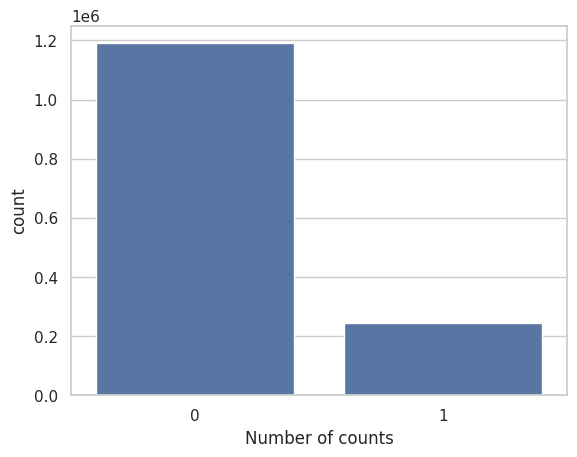

In [40]:
# Output Barplot showing the occurence of flight outcome

sns.set_context("notebook")
g=sns.countplot(x="FLIGHT_STATUS",data=flight_data)
g.set(xlabel="Number of counts")

[Text(0.5, 0, 'Number of counts')]

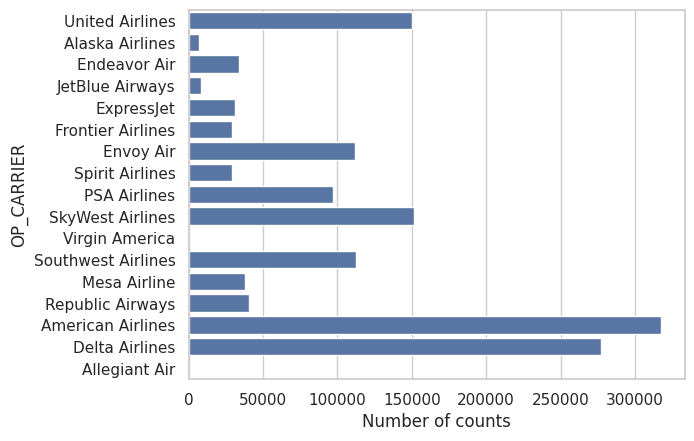

In [41]:
# Output Barplot showing the occurence of each categorical features

sns.set_context("notebook")
g=sns.countplot(y="OP_CARRIER",data=flight_category)
g.set(xlabel="Number of counts")

[Text(0.5, 0, 'Number of counts')]

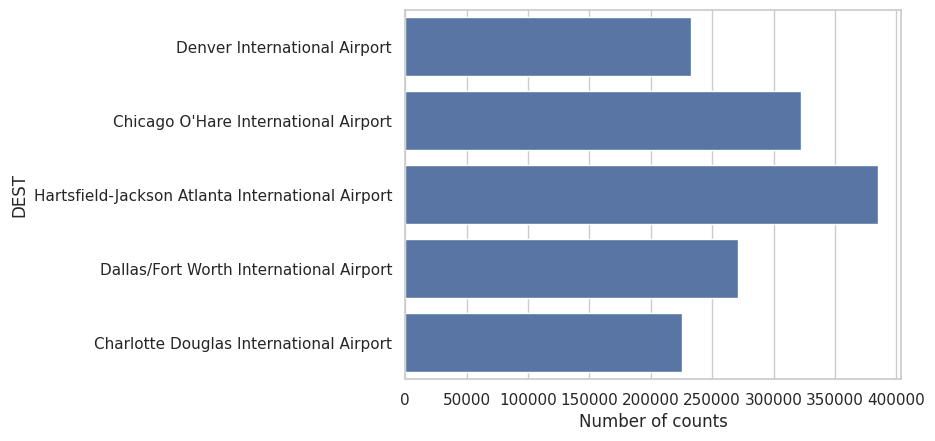

In [42]:
# Output Barplot showing the occurence of each categorical features

sns.set_context("notebook")
g=sns.countplot(y="DEST",data=flight_category)
g.set(xlabel="Number of counts")

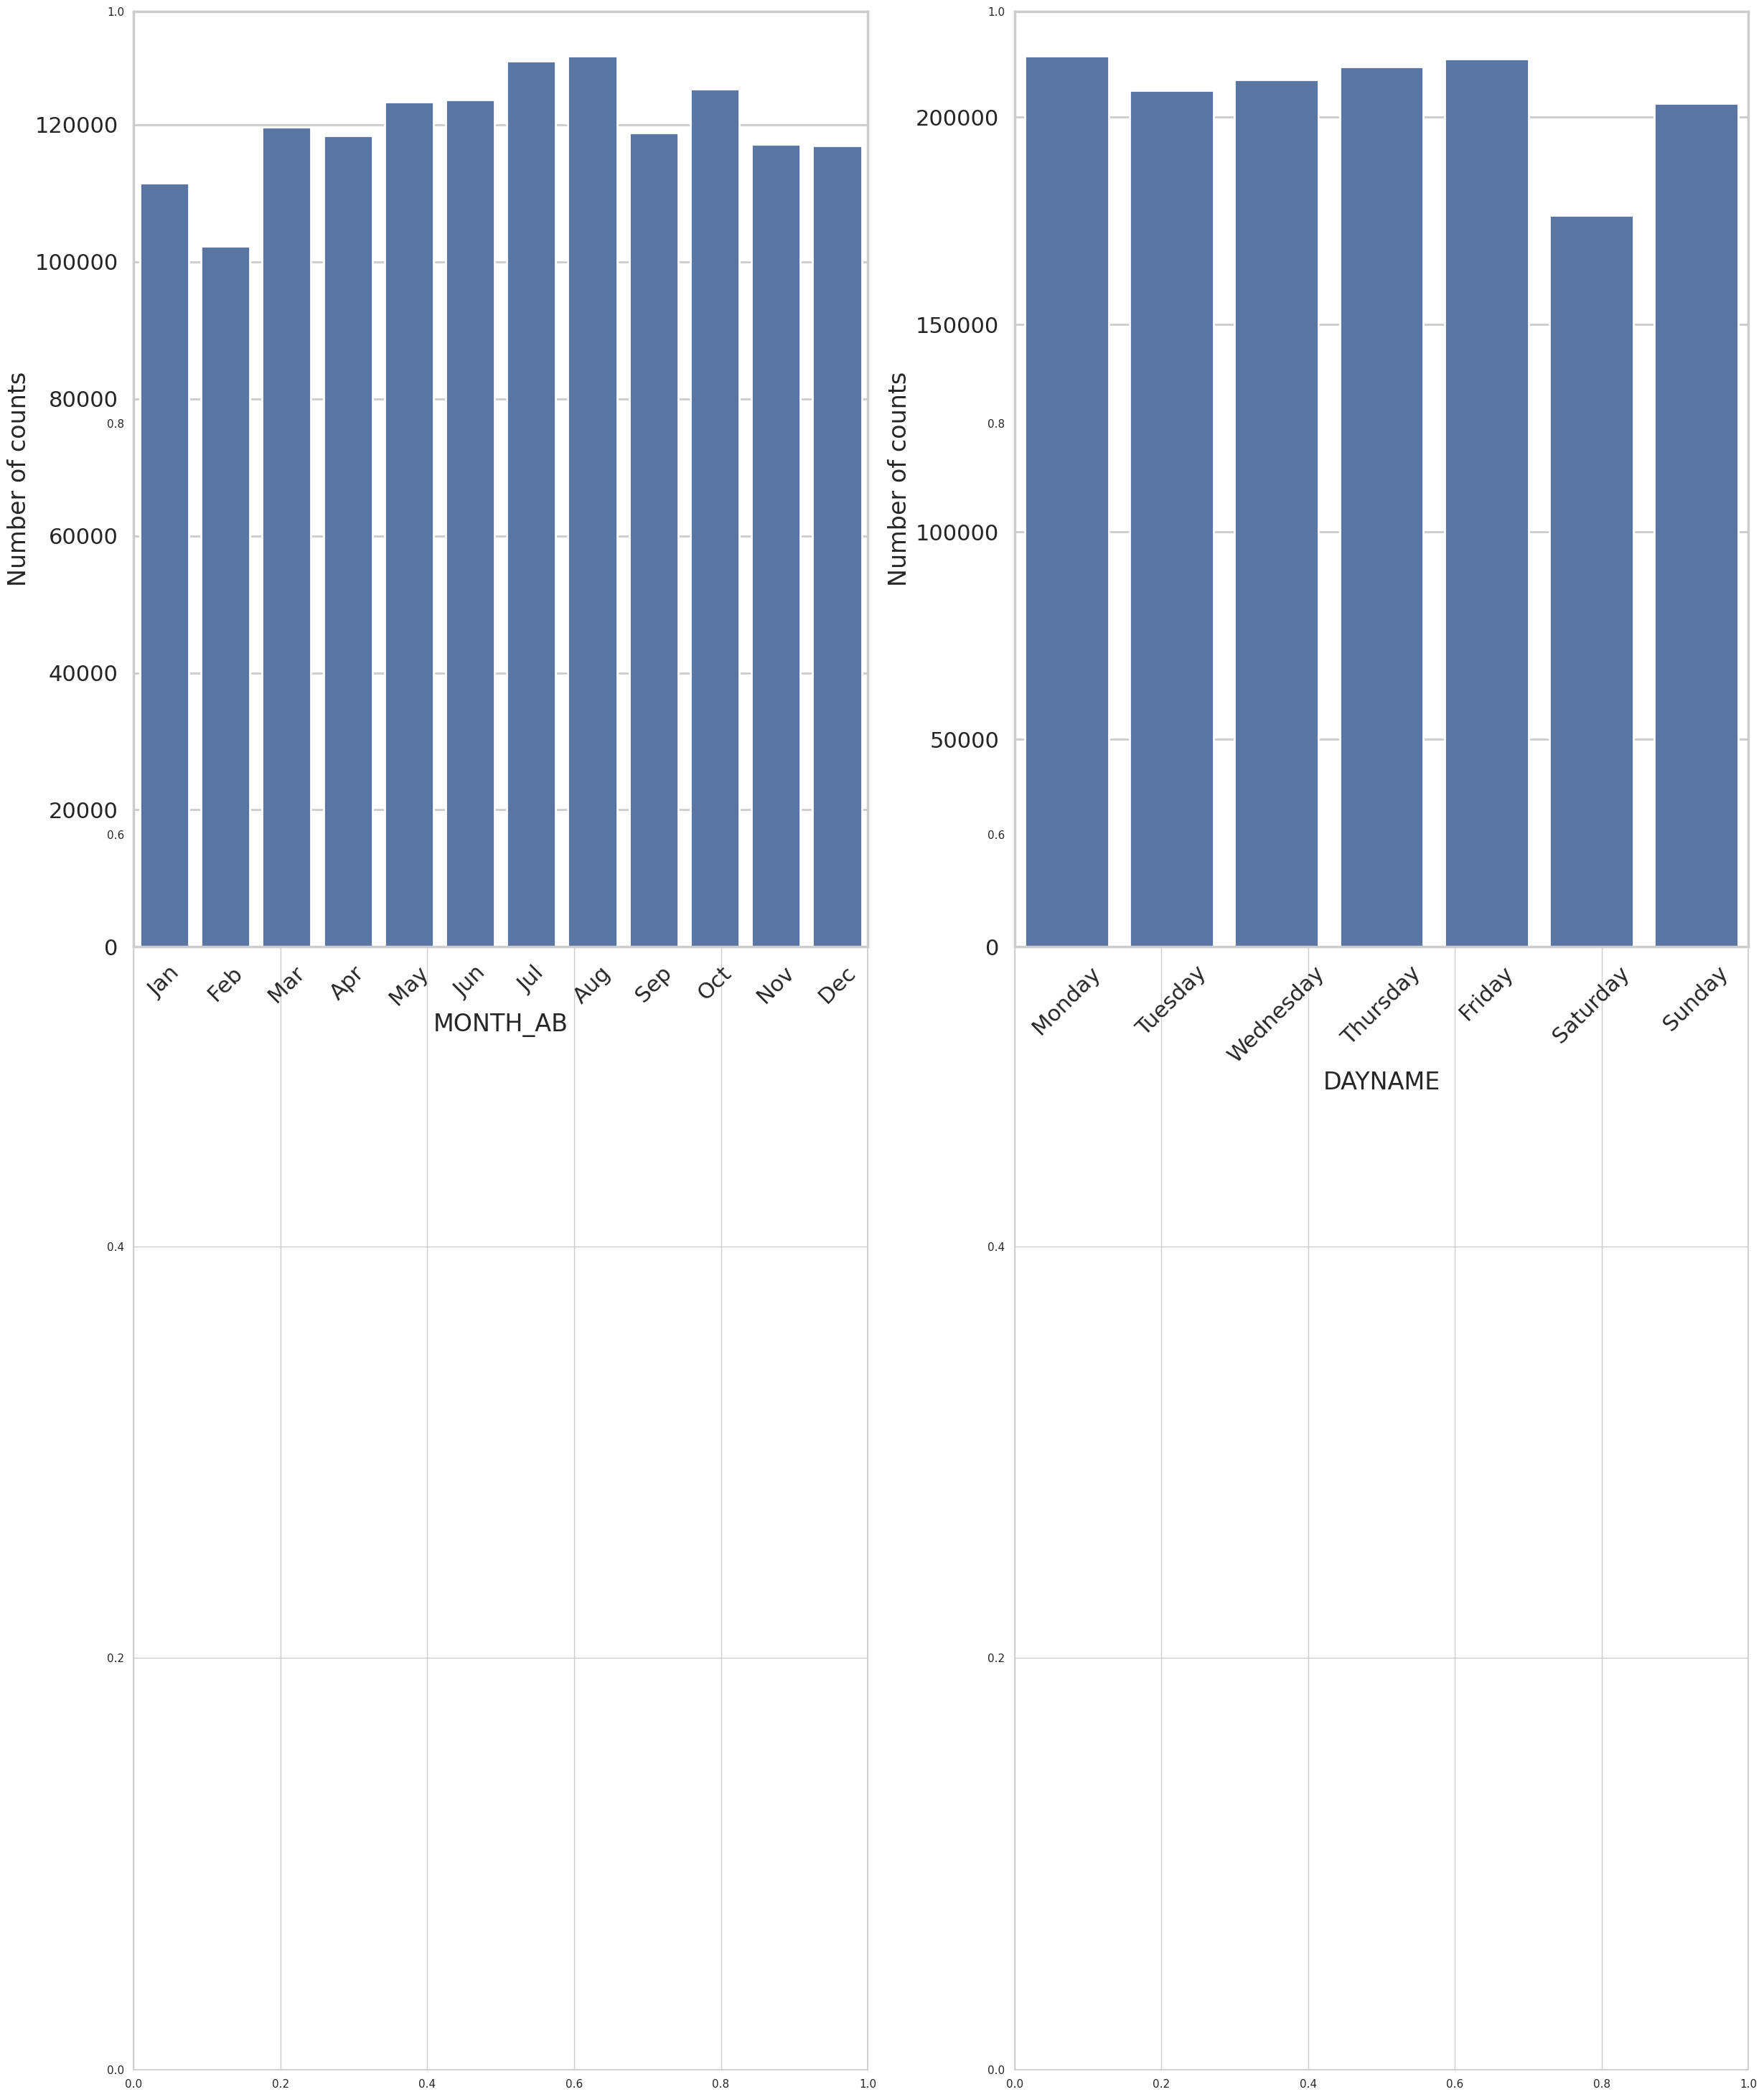

In [43]:
# Finding categorical features

category = []
for i in flight_category:
    if i in ["ORIGIN","DEST","OP_CARRIER","FLIGHT_STATUS"]:
        pass
    else:
        category.append(i)

# Output Barplot showing the occurence of each categorical features
fig, ax = plt.subplots(ncols=2, figsize=(12,12))
plt.subplots_adjust(right=2)
plt.subplots_adjust(top=2.5)
sns.color_palette("husl", 8)
sns.set_context("poster")

#ncols=2,nrows=round(len(list(category))/2)

for i, feature in enumerate(list(flight_category[category]), 1):
    plt.subplot(len(list(category)), 2, i)
    g=sns.countplot(x=feature,data=flight_category)
    g.set(ylabel="Number of counts")
    plt.xticks(rotation=45)

plt.show()

# **Classification Modelling**
**Data Preparation**

Encoding
Feature Selection
One hot encoding for categorical attributes
We converted some categorical variables into numeric variables via one hot encoding method in which one dummy variable would be created for every object in the categorical variable. If the particular object is present, the value would be denoted as 1, otherwise the value would be 0.

In [44]:
Carrier = pd.get_dummies(flight_data['OP_CARRIER'],prefix="OP_CARRIER",drop_first=False)
#Destination = pd.get_dummies(flight_data['DEST'],drop_first=False)
#Destination.columns = ['Charlotte_Airport','Chicago_Airport','Dallas_Airpot','Denver_Airport','Dentroit_Airport','GELL_Airpot','George_Aiport','Hartsfield_Airport','JohnFKeenedy_Airpot','LaGuardia_Airport','LosAngelas_Airport','McCarran_Airport','MSP_Airport','NL_Airport','Orlando_Airport','Philadelphia_Airport','Phoenix_Airport','Ronald_Airport','SanFrancisco_Airport','Seattle_Aiport']
month= pd.get_dummies(flight_data['MONTH_AB'],prefix="MONTH",drop_first=False)
day= pd.get_dummies(flight_data['DAYNAME'],prefix="DAY",drop_first=False)

#flight_data_new=pd.concat([flight_data,Carrier,Destination,month,day],axis=1)
flight_data_new=pd.concat([flight_data,Carrier,month,day],axis=1)

In [45]:
flight_data_new.head(2)

,FL_DATE,OP_CARRIER,ORIGIN,DEST,DEP_DELAY,TAXI_OUT,TAXI_IN,ARR_DELAY,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,WHEELS_OFF_elapse,WHEELS_ON_elapse,DAY,MONTH,MONTH_AB,DAYOFWEEK,DAYNAME,WEEKDAY,FLIGHT_STATUS,OP_CARRIER_Alaska Airlines,OP_CARRIER_Allegiant Air,OP_CARRIER_American Airlines,OP_CARRIER_Delta Airlines,OP_CARRIER_Endeavor Air,OP_CARRIER_Envoy Air,OP_CARRIER_ExpressJet,OP_CARRIER_Frontier Airlines,OP_CARRIER_JetBlue Airways,OP_CARRIER_Mesa Airline,OP_CARRIER_PSA Airlines,OP_CARRIER_Republic Airways,OP_CARRIER_SkyWest Airlines,OP_CARRIER_Southwest Airlines,OP_CARRIER_Spirit Airlines,OP_CARRIER_United Airlines,OP_CARRIER_Virgin America,MONTH_Apr,MONTH_Aug,MONTH_Dec,MONTH_Feb,MONTH_Jan,MONTH_Jul,MONTH_Jun,MONTH_Mar,MONTH_May,MONTH_Nov,MONTH_Oct,MONTH_Sep,DAY_Friday,DAY_Monday,DAY_Saturday,DAY_Sunday,DAY_Thursday,DAY_Tuesday,DAY_Wednesday
0,2018-01-01,United Airlines,Newark Liberty International Airport,Denver International Airport,-5.0,15.0,10.0,-23.0,0.0,268.0,250.0,225.0,1605.0,0.0,0.0,0.0,0.0,0.0,15.0,10.0,1,1,Jan,0,Monday,1,0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False
2,2018-01-01,United Airlines,John Wayne AirportÂ (Orange County Airport),Denver International Airport,-5.0,15.0,5.0,-13.0,0.0,134.0,126.0,106.0,846.0,0.0,0.0,0.0,0.0,0.0,15.0,5.0,1,1,Jan,0,Monday,1,0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False


**Feature selection**


*   Drop redundant columns
*   Drop constant columns
*   Remove multicollinearity effect
*   Importance by Random Forest


**Drop redundant columns**

In [46]:
# Drop the redundant columns

flight_data_new.drop(['FL_DATE',
                      'OP_CARRIER',
                      'ORIGIN',
                      'DEST',
                      'DAYOFWEEK',
                      'MONTH',
                      'MONTH_AB',
                      'DAY',
                      'DAYNAME',
                      'WEEKDAY',
                      'ARR_DELAY',
                      'CARRIER_DELAY',
                      'WEATHER_DELAY',
                      'NAS_DELAY',
                      'SECURITY_DELAY',
                      'LATE_AIRCRAFT_DELAY'
                 ],
                 axis = 1, inplace = True)

In [47]:
flight_data_new.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1436061 entries, 0 to 7213445
Data columns (total 47 columns):
 #   Column                         Non-Null Count    Dtype  
---  ------                         --------------    -----  
 0   DEP_DELAY                      1436061 non-null  float64
 1   TAXI_OUT                       1436061 non-null  float64
 2   TAXI_IN                        1436061 non-null  float64
 3   DIVERTED                       1436061 non-null  float64
 4   CRS_ELAPSED_TIME               1436061 non-null  float64
 5   ACTUAL_ELAPSED_TIME            1436061 non-null  float64
 6   AIR_TIME                       1436061 non-null  float64
 7   DISTANCE                       1436061 non-null  float64
 8   WHEELS_OFF_elapse              1436061 non-null  float64
 9   WHEELS_ON_elapse               1436061 non-null  float64
 10  FLIGHT_STATUS                  1436061 non-null  int64  
 11  OP_CARRIER_Alaska Airlines     1436061 non-null  bool   
 12  OP_CARRIER_Allegian

**Drop constant variable**

In [48]:
!pip install feature-engine
from sklearn.model_selection import train_test_split
from feature_engine.selection import DropConstantFeatures

In [49]:
# separate train and test (again, as we transformed the previous ones)

X_train, X_test, y_train, y_test = train_test_split(
    flight_data_new.drop(labels=['FLIGHT_STATUS'], axis=1),
    flight_data_new['FLIGHT_STATUS'],
    test_size=0.2,
    random_state=100)

X_train.shape, X_test.shape

((1148848, 46), (287213, 46))

In [50]:
sel = DropConstantFeatures(tol=1, variables=None, missing_values='raise')
sel.fit(X_train)

DropConstantFeatures()

In [51]:
# number of quasi-constant features

len(sel.features_to_drop_)

1

In [52]:
sel.features_to_drop_

['DIVERTED']

**DIVERTED** is a constant features with only one kind of response for all instances. This does not give any information to the model, hence we will drop it.

In [53]:
# Drop the redundant columns
flight_data_new.drop(['DIVERTED'], axis = 1, inplace = True)

In [54]:
#remove the constant features

X_train = sel.transform(X_train)
X_test = sel.transform(X_test)

X_train.shape, X_test.shape

((1148848, 45), (287213, 45))

**Remove multicollinearity effect (Positive)**

In [55]:
# build a dataframe with the correlation between features
# remember that the absolute value of the correlation
# coefficient is important and not the sign

corrmat = X_train.corr()
corrmat = corrmat.abs().unstack() # absolute value of corr coef
corrmat = corrmat.sort_values(ascending=False)
corrmat = corrmat[corrmat >= 0.8]
corrmat = corrmat[corrmat < 1]
corrmat = pd.DataFrame(corrmat).reset_index()
corrmat.columns = ['feature1', 'feature2', 'corr']

In [56]:
corrmat

,feature1,feature2,corr
0,AIR_TIME,CRS_ELAPSED_TIME,0.983174
1,CRS_ELAPSED_TIME,AIR_TIME,0.983174
2,ACTUAL_ELAPSED_TIME,AIR_TIME,0.977476
3,AIR_TIME,ACTUAL_ELAPSED_TIME,0.977476
4,DISTANCE,AIR_TIME,0.975989
5,AIR_TIME,DISTANCE,0.975989
6,DISTANCE,CRS_ELAPSED_TIME,0.975041
7,CRS_ELAPSED_TIME,DISTANCE,0.975041
8,ACTUAL_ELAPSED_TIME,CRS_ELAPSED_TIME,0.968321
9,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,0.968321


In [57]:
corrmat.feature1.unique()

array(['AIR_TIME', 'CRS_ELAPSED_TIME', 'ACTUAL_ELAPSED_TIME', 'DISTANCE'],
      dtype=object)

In [58]:
grouped_feature_ls = []
correlated_groups = []

for feature in corrmat.feature1.unique():

    if feature not in grouped_feature_ls:

        # find all features correlated to a single feature
        correlated_block = corrmat[corrmat.feature1 == feature]
        grouped_feature_ls = grouped_feature_ls + list(
            correlated_block.feature2.unique()) + [feature]

        # append the block of features to the list
        correlated_groups.append(correlated_block)

print('found {} correlated groups'.format(len(correlated_groups)))
print('out of {} total features'.format(X_train.shape[1]))

found 1 correlated groups
out of 45 total features


In [59]:
# now we can print out each group. We see that some groups contain
# only 2 correlated features, some other groups present several features
# that are correlated among themselves.

for group in correlated_groups:
    print(group)
    print()

   feature1             feature2      corr
0  AIR_TIME     CRS_ELAPSED_TIME  0.983174
3  AIR_TIME  ACTUAL_ELAPSED_TIME  0.977476
5  AIR_TIME             DISTANCE  0.975989



In [60]:
# we can now investigate further features within one group.
# let's for example select group 1

group = correlated_groups[0]
group

,feature1,feature2,corr
0,AIR_TIME,CRS_ELAPSED_TIME,0.983174
3,AIR_TIME,ACTUAL_ELAPSED_TIME,0.977476
5,AIR_TIME,DISTANCE,0.975989


In this group, several features are highly correlated. Which one should we keep and which ones should we remove? Alternatively, we could build a machine learning algorithm using all the features from the above list, and select the more predictive one.

In [61]:
from sklearn.ensemble import RandomForestClassifier

# add all features of the group to a list
features = list(group['feature2'].unique())+['CRS_ELAPSED_TIME']

# train a random forest
rf = RandomForestClassifier(n_estimators=100, random_state=100, max_depth=4)
rf.fit(X_train[features].fillna(0), y_train)

RandomForestClassifier(max_depth=4, random_state=100)

In [62]:
# get the feature importance attributed by the
# random forest model (more on this in coming lectures)

importance = pd.concat(
    [pd.Series(features),
     pd.Series(rf.feature_importances_)], axis=1)

importance.columns = ['feature', 'importance']

# sort features by importance, most important first
importance.sort_values(by='importance', ascending=False)

,feature,importance
1,ACTUAL_ELAPSED_TIME,0.504509
0,CRS_ELAPSED_TIME,0.205492
3,CRS_ELAPSED_TIME,0.204765
2,DISTANCE,0.085235


**ACTUAL_ELAPSED_TIME**,**CRS_ELAPSED_TIME**,**AIR_TIME** are highly correlated to each other as they are transformed from the same attributes. Thus, we keep **ACTUAL_ELAPSED_TIME** as it gives the greatest importance as compared to other attributes.

In [63]:
#X_train = X_train.drop(['CRS_ELAPSED_TIME','AIR_TIME'], axis = 1, inplace = True)
#X_test = X_test.drop(['CRS_ELAPSED_TIME','AIR_TIME'], axis = 1, inplace = True)

In [64]:
# Drop the redundant columns
flight_data_new.drop(['CRS_ELAPSED_TIME','AIR_TIME'], axis = 1, inplace = True)

**Remove multicollinearity effect (Negative)**

In [65]:
# build a dataframe with the correlation between features
# remember that the absolute value of the correlation
# coefficient is important and not the sign

corrmat = X_train.corr()
corrmat = corrmat.abs().unstack() # absolute value of corr coef
corrmat = corrmat.sort_values(ascending=False)
corrmat = corrmat[corrmat <= -0.8]
corrmat = corrmat[corrmat > -1]
corrmat = pd.DataFrame(corrmat).reset_index()
corrmat.columns = ['feature1', 'feature2', 'corr']

In [66]:
grouped_feature_ls = []
correlated_groups = []

for feature in corrmat.feature1.unique():

    if feature not in grouped_feature_ls:

        # find all features correlated to a single feature
        correlated_block = corrmat[corrmat.feature1 == feature]
        grouped_feature_ls = grouped_feature_ls + list(
            correlated_block.feature2.unique()) + [feature]

        # append the block of features to the list
        correlated_groups.append(correlated_block)

print('found {} correlated groups'.format(len(correlated_groups)))
print('out of {} total features'.format(X_train.shape[1]))

found 0 correlated groups
out of 45 total features


# **Importance by Random Forest**

In [67]:
X_train, X_test, y_train, y_test = train_test_split(
    flight_data_new.drop(labels=['FLIGHT_STATUS'], axis=1),
    flight_data_new['FLIGHT_STATUS'],
    test_size=0.2,
    random_state=100)

X_train.shape, X_test.shape

((1148848, 43), (287213, 43))

In [68]:
rf = RandomForestClassifier(n_estimators=100, random_state=100, max_depth=5)
rf.fit(X_train, y_train)
rf.feature_importances_

array([6.30553659e-01, 1.44573986e-01, 4.74350141e-02, 1.15665883e-02,
       3.26089033e-03, 1.10233282e-01, 3.79181210e-02, 3.16837978e-06,
       1.83581728e-08, 1.55367452e-04, 3.75417471e-03, 2.12653647e-05,
       4.14156940e-05, 3.29100354e-05, 1.69563751e-03, 3.28474425e-04,
       9.53994886e-05, 1.12303565e-04, 2.54125660e-05, 1.03102580e-03,
       1.64578027e-04, 3.81492556e-05, 1.61127166e-04, 1.71279521e-06,
       8.16500879e-04, 5.47830863e-04, 5.14746948e-05, 9.83213714e-06,
       3.62741774e-04, 4.58367322e-04, 1.97951105e-03, 1.62970241e-03,
       1.01055814e-05, 6.19039448e-05, 4.41644993e-05, 2.75735936e-05,
       4.06453983e-05, 1.97612936e-04, 4.40911420e-04, 1.45458548e-05,
       2.65593353e-05, 1.95892634e-05, 5.67454058e-05])

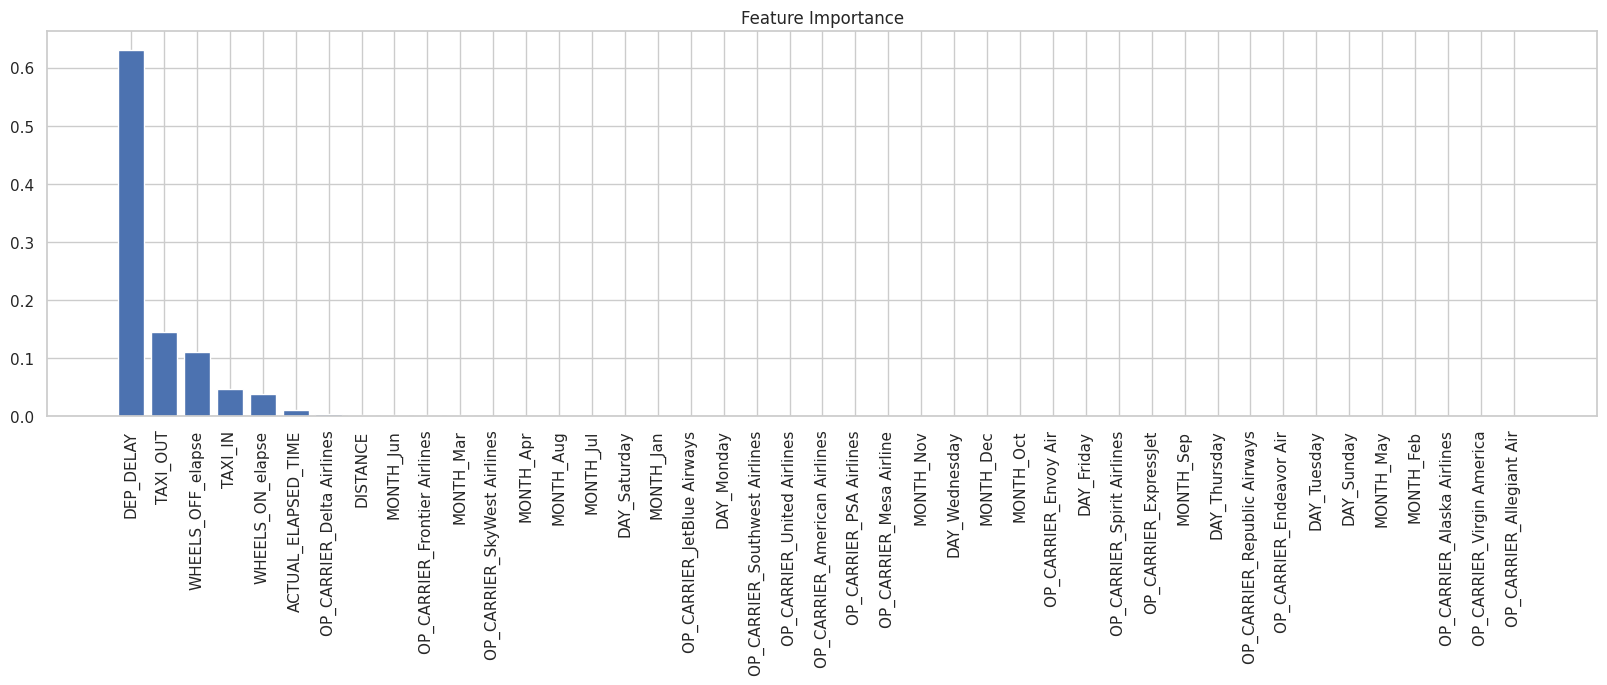

In [69]:
# Sorting in descending order and rearranging feature names to match sorted feature importance
importance = rf.feature_importances_
indices = np.argsort(importance)[::-1]
names = [X_train.columns[i] for i in indices]

# Bar chart creation
sns.set_context("notebook")
plt.figure(figsize=(20, 5))
plt.title("Feature Importance")
plt.bar(range(X_train.shape[1]), importance[indices])
plt.xticks(range(X_train.shape[1]), names, rotation = 90)

plt.show()

In [70]:
features=pd.DataFrame(names)
scale = pd.DataFrame(importance[indices])
keep_features = pd.concat([features, scale],axis=1)
keep_features

,0,0
0,DEP_DELAY,6.305537e-01
1,TAXI_OUT,1.445740e-01
2,WHEELS_OFF_elapse,1.102333e-01
3,TAXI_IN,4.743501e-02
4,WHEELS_ON_elapse,3.791812e-02
5,ACTUAL_ELAPSED_TIME,1.156659e-02
6,OP_CARRIER_Delta Airlines,3.754175e-03
7,DISTANCE,3.260890e-03
8,MONTH_Jun,1.979511e-03
9,OP_CARRIER_Frontier Airlines,1.695638e-03


# **Classification Modelling**

In [71]:
from sklearn.metrics import (
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    accuracy_score,
    confusion_matrix,
    classification_report,
    ConfusionMatrixDisplay,
    PrecisionRecallDisplay
)

## **Base classifiers**


*   Logistic regression
*   Decision Tree
*   SVM
*   Random Forest



In [72]:
flight_data_new.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1436061 entries, 0 to 7213445
Data columns (total 44 columns):
 #   Column                         Non-Null Count    Dtype  
---  ------                         --------------    -----  
 0   DEP_DELAY                      1436061 non-null  float64
 1   TAXI_OUT                       1436061 non-null  float64
 2   TAXI_IN                        1436061 non-null  float64
 3   ACTUAL_ELAPSED_TIME            1436061 non-null  float64
 4   DISTANCE                       1436061 non-null  float64
 5   WHEELS_OFF_elapse              1436061 non-null  float64
 6   WHEELS_ON_elapse               1436061 non-null  float64
 7   FLIGHT_STATUS                  1436061 non-null  int64  
 8   OP_CARRIER_Alaska Airlines     1436061 non-null  bool   
 9   OP_CARRIER_Allegiant Air       1436061 non-null  bool   
 10  OP_CARRIER_American Airlines   1436061 non-null  bool   
 11  OP_CARRIER_Delta Airlines      1436061 non-null  bool   
 12  OP_CARRIER_Endeavor

In [73]:
flight_data_new["FLIGHT_STATUS"] = flight_data_new["FLIGHT_STATUS"].astype('category')

In [74]:
flight_data_new.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1436061 entries, 0 to 7213445
Data columns (total 44 columns):
 #   Column                         Non-Null Count    Dtype   
---  ------                         --------------    -----   
 0   DEP_DELAY                      1436061 non-null  float64 
 1   TAXI_OUT                       1436061 non-null  float64 
 2   TAXI_IN                        1436061 non-null  float64 
 3   ACTUAL_ELAPSED_TIME            1436061 non-null  float64 
 4   DISTANCE                       1436061 non-null  float64 
 5   WHEELS_OFF_elapse              1436061 non-null  float64 
 6   WHEELS_ON_elapse               1436061 non-null  float64 
 7   FLIGHT_STATUS                  1436061 non-null  category
 8   OP_CARRIER_Alaska Airlines     1436061 non-null  bool    
 9   OP_CARRIER_Allegiant Air       1436061 non-null  bool    
 10  OP_CARRIER_American Airlines   1436061 non-null  bool    
 11  OP_CARRIER_Delta Airlines      1436061 non-null  bool    
 12  OP_CA

In [75]:
X_train, X_test, y_train, y_test = train_test_split(
    flight_data_new.drop(labels=['FLIGHT_STATUS'], axis=1),
    flight_data_new['FLIGHT_STATUS'],
    test_size=0.2,
    random_state=100)

X_train.shape, X_test.shape

((1148848, 43), (287213, 43))

## **Logistic Regression**

In [76]:
from sklearn.linear_model import LogisticRegression

In [77]:
def run_logisticReg(X_train, X_test, y_train, y_test):
    lr = LogisticRegression(random_state=100)
    lr.fit(X_train, y_train)

    print('Test set')
    pred = lr.predict_proba(X_test)
    print('Roc-auc Logistic Regression roc-auc: {}'.format(roc_auc_score(y_test, pred[:,1])))
    print()
    print('Accuracy Logistic Regression:', accuracy_score(y_test, lr.predict(X_test)))
    print()
    print('Precision Logistic Regression:', precision_score(y_test, lr.predict(X_test),pos_label=1))
    print()
    print('Recall Logistic Regression:', recall_score(y_test, lr.predict(X_test),pos_label=1))
    print()
    print('F-measure Logistic Regression:', f1_score(y_test, lr.predict(X_test),pos_label=1))
    print()
    print('Summary Report:')
    print(classification_report(y_test, lr.predict(X_test)))

In [78]:
run_logisticReg(X_train, X_test, y_train, y_test)

Test set
Roc-auc Logistic Regression roc-auc: 0.9856560981279479

Accuracy Logistic Regression: 0.9569552910209496

Precision Logistic Regression: 0.9071635946256161

Recall Logistic Regression: 0.8303052774687925

F-measure Logistic Regression: 0.8670344916594069

Summary Report:
              precision    recall  f1-score   support

           0       0.97      0.98      0.97    238667
           1       0.91      0.83      0.87     48546

    accuracy                           0.96    287213
   macro avg       0.94      0.91      0.92    287213
weighted avg       0.96      0.96      0.96    287213



## **Decision Tree**

In [79]:
from sklearn.tree import DecisionTreeClassifier

In [80]:
def run_DT(X_train, X_test, y_train, y_test):
    DT = DecisionTreeClassifier(random_state=100)
    DT = DT.fit(X_train,y_train)

    print('Test set')
    pred = DT.predict_proba(X_test)
    print('Roc-auc Decision Tree roc-auc: {}'.format(roc_auc_score(y_test, pred[:,1])))
    print()
    print('Accuracy Decision Tree:', accuracy_score(y_test, DT.predict(X_test)))
    print()
    print('Precision Decision Tree:', precision_score(y_test, DT.predict(X_test),pos_label=1))
    print()
    print('Recall Decision Tree:', recall_score(y_test, DT.predict(X_test),pos_label=1))
    print()
    print('F-measure Decision Tree:', f1_score(y_test, DT.predict(X_test),pos_label=1))
    print()
    print('Summary Report:')
    print(classification_report(y_test, DT.predict(X_test)))

In [81]:
run_DT(X_train, X_test, y_train, y_test)

Test set
Roc-auc Decision Tree roc-auc: 0.9055388952990042

Accuracy Decision Tree: 0.9465936430454053

Precision Decision Tree: 0.8410253250354304

Recall Decision Tree: 0.8434680509207761

F-measure Decision Tree: 0.8422449168492179

Summary Report:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97    238667
           1       0.84      0.84      0.84     48546

    accuracy                           0.95    287213
   macro avg       0.90      0.91      0.91    287213
weighted avg       0.95      0.95      0.95    287213




## **Random Forest**

In [82]:
def run_randomForests(X_train, X_test, y_train, y_test):
    rf = RandomForestClassifier(n_estimators=100, random_state=100, max_depth=4)
    rf.fit(X_train, y_train)

    print('Test set')
    pred = rf.predict_proba(X_test)
    print('Roc-auc Random Forests roc-auc: {}'.format(roc_auc_score(y_test, pred[:,1])))
    print()
    print('Accuracy Random Forest test:', accuracy_score(y_test, rf.predict(X_test)))
    print()
    print('Precision Random Forest test:', precision_score(y_test, rf.predict(X_test),pos_label=1))
    print()
    print('Recall Random Forest test:', recall_score(y_test, rf.predict(X_test),pos_label=1))
    print()
    print('F-measure Random Forest test:', f1_score(y_test, rf.predict(X_test),pos_label=1))
    print()
    print('Summary Report:')
    print(classification_report(y_test, rf.predict(X_test)))

In [83]:
run_randomForests(X_train, X_test, y_train, y_test)

Test set
Roc-auc Random Forests roc-auc: 0.9658827583000704

Accuracy Random Forest test: 0.9421091663678176

Precision Random Forest test: 0.9439730714663255

Recall Random Forest test: 0.6989865282412557

F-measure Random Forest test: 0.803214467470678

Summary Report:
              precision    recall  f1-score   support

           0       0.94      0.99      0.97    238667
           1       0.94      0.70      0.80     48546

    accuracy                           0.94    287213
   macro avg       0.94      0.85      0.88    287213
weighted avg       0.94      0.94      0.94    287213



In [84]:
pip install tensorflow scikit-learn numpy matplotlib

Converting data types...
Data shapes:
X_train shape: (1148848, 43)
X_test shape: (287213, 43)
y_train shape: (1148848,)
y_test shape: (287213,)
Starting model training...
Preparing data...
Creating model...
Training model...
Epoch 1/100
3591/3591 ━━━━━━━━━━━━━━━━━━━━ 94s 25ms/step - accuracy: 0.9349 - auc: 0.9600 - loss: 0.7667 - val_accuracy: 0.9451 - val_auc: 0.9815 - val_loss: 0.1869 - learning_rate: 0.0010
Epoch 2/100
3591/3591 ━━━━━━━━━━━━━━━━━━━━ 138s 24ms/step - accuracy: 0.9470 - auc: 0.9780 - loss: 0.1805 - val_accuracy: 0.9525 - val_auc: 0.9840 - val_loss: 0.1577 - learning_rate: 0.0010
Epoch 3/100
3591/3591 ━━━━━━━━━━━━━━━━━━━━ 92s 26ms/step - accuracy: 0.9476 - auc: 0.9786 - loss: 0.1645 - val_accuracy: 0.9563 - val_auc: 0.9856 - val_loss: 0.1448 - learning_rate: 0.0010
Epoch 4/100
3591/3591 ━━━━━━━━━━━━━━━━━━━━ 139s 25ms/step - accuracy: 0.9483 - auc: 0.9792 - loss: 0.1581 - val_accuracy: 0.9562 - val_auc: 0.9857 - val_loss: 0.1414 - learning_rate: 0.0010
Epoch 5/100
3591/

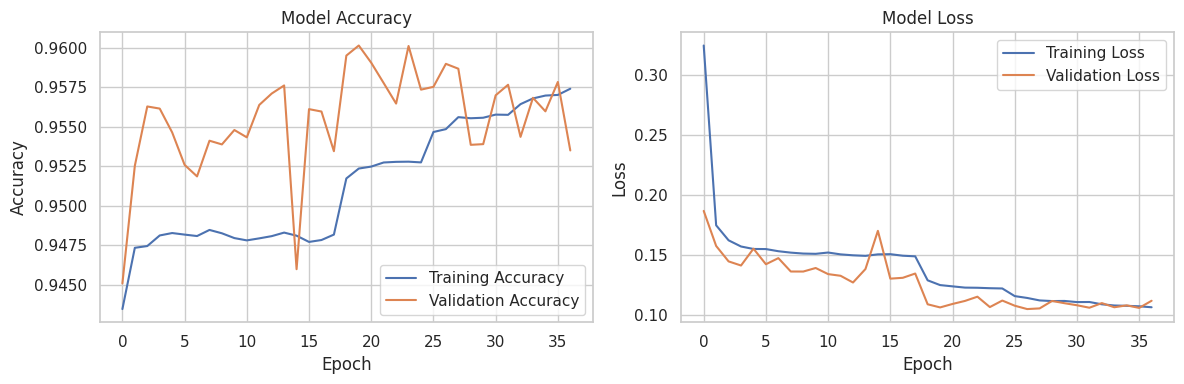

In [85]:
import tensorflow as tf
from tensorflow.keras import layers, models, regularizers
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

print("Converting data types...")
y_train = y_train.astype(int)
y_test = y_test.astype(int)

X_train = pd.DataFrame(X_train)
X_test = pd.DataFrame(X_test)

categorical_columns = X_train.select_dtypes(include=['category']).columns
for col in categorical_columns:
    X_train[col] = X_train[col].astype(int)
    X_test[col] = X_test[col].astype(int)

X_train = X_train.to_numpy()
X_test = X_test.to_numpy()

def prepare_data(X_train, X_test, y_train, y_test):
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    X_train_scaled = X_train_scaled.astype('float32')
    X_test_scaled = X_test_scaled.astype('float32')
    y_train = y_train.astype('float32')
    y_test = y_test.astype('float32')

    return X_train_scaled, X_test_scaled, y_train, y_test

def create_model(input_dim):
    model = models.Sequential([
        layers.Input(shape=(input_dim,)),
        layers.Dense(512, kernel_regularizer=regularizers.l2(0.01)),
        layers.BatchNormalization(),
        layers.ReLU(),
        layers.Dropout(0.3),
        layers.Dense(256, kernel_regularizer=regularizers.l2(0.01)),
        layers.BatchNormalization(),
        layers.ReLU(),
        layers.Dropout(0.3),
        layers.Dense(128, kernel_regularizer=regularizers.l2(0.01)),
        layers.BatchNormalization(),
        layers.ReLU(),
        layers.Dropout(0.2),
        layers.Dense(64, kernel_regularizer=regularizers.l2(0.01)),
        layers.BatchNormalization(),
        layers.ReLU(),
        layers.Dropout(0.2),
        layers.Dense(32, activation='relu'),
        layers.Dense(1, activation='sigmoid')
    ])
    return model

def train_evaluate_model(X_train, X_test, y_train, y_test):
    print("Preparing data...")
    X_train_scaled, X_test_scaled, y_train, y_test = prepare_data(X_train, X_test, y_train, y_test)

    print("Creating model...")
    model = create_model(X_train.shape[1])

    optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
    model.compile(
        optimizer=optimizer,
        loss='binary_crossentropy',
        metrics=['accuracy', tf.keras.metrics.AUC(name='auc')]
    )

    early_stopping = tf.keras.callbacks.EarlyStopping(
        monitor='val_loss',
        patience=10,
        restore_best_weights=True
    )

    reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(
        monitor='val_loss',
        factor=0.2,
        patience=5,
        min_lr=0.00001
    )

    print("Training model...")
    history = model.fit(
        X_train_scaled,
        y_train,
        validation_split=0.2,
        epochs=100,
        batch_size=256,
        callbacks=[early_stopping, reduce_lr],
        verbose=1
    )

    print("\nModel Evaluation:")
    test_results = model.evaluate(X_test_scaled, y_test, verbose=0)
    print(f"Test Loss: {test_results[0]:.4f}")
    print(f"Test Accuracy: {test_results[1]:.4f}")
    print(f"Test AUC: {test_results[2]:.4f}")

    y_pred = model.predict(X_test_scaled)
    y_pred_classes = (y_pred > 0.5).astype(int)

    print("\nClassification Report:")
    print(classification_report(y_test, y_pred_classes))

    return model, history

def plot_training_history(history):
    plt.figure(figsize=(12, 4))

    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Model Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()

print("Data shapes:")
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

print("Starting model training...")
model, history = train_evaluate_model(X_train, X_test, y_train, y_test)

print("Plotting training history...")
plot_training_history(history)
